# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as  plt 
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
indices = [43,196,250]
print("Indices: {}".format(indices))
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Indices: [43, 196, 250]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,30624,7209,4897,18711,763,2876
2,3191,1993,1799,1730,234,710


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments hey might be? 


**Answer:**

Text(0.5,1,u"Comparison of Samples' Percentile")

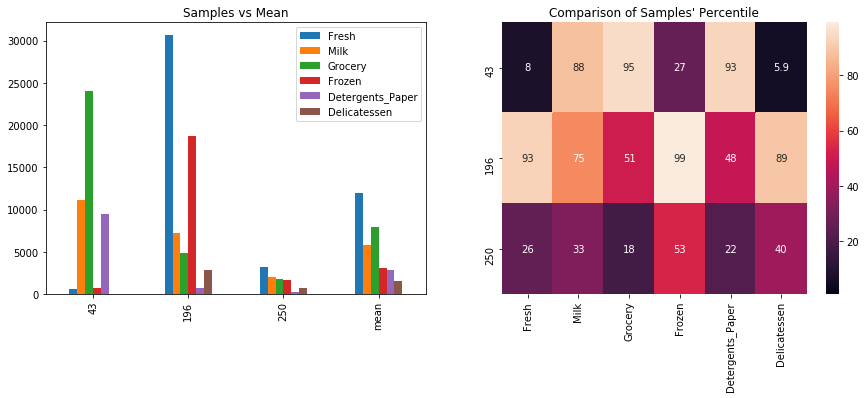

In [4]:
ax1 = plt.subplot(1, 2, 1)

#The means 
mean_data = data.describe().loc['mean', :]

#Append means to the samples' data
samples_bar = samples.append(mean_data)

#Construct indices
samples_bar.index = indices + ['mean']

#Plot bar plot
samples_bar.plot(kind='bar', figsize=(15,5), ax=ax1)
ax1.set_title("Samples vs Mean")

ax2 = plt.subplot(1, 2, 2)

# percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map
sns.heatmap(percentiles, vmin=1, vmax=99, ax=ax2, annot=True)
ax2.set_title("Comparison of Samples' Percentile")

***Sample 1 (Index 0):*** For the first sample the spending on Grocey, Milk and Detergent_paper are over the mean and percentil 75, nevertheless Fresh and Frozen is less than mean and not spending on Delicatessen. This customer could be a retailer not specialized in perishable food.

***Sample 2 (Index 1):*** This could be a Restaurant. We can see the the spending on Fresh, Frozen, Milk and Delicatessen are over the mean and percentile 75, and the other products have less spending than mean.

***Sample 3 (Index 2):*** This could be a small cafe. We can see all the spending are less than the mean, nevertheless, we can see that this customer is spending more on Fresh than the others products.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
#Imports
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV



#Test each feature like dependent variable and print r2 score
def feature_like_dependent_variable(values, size):
    
    results = {}
    values_size = values[:size]
    for i,var in enumerate(feature_list):
        # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
        new_data = values_size.drop([var], axis=1, inplace = False )    
        target=  pd.DataFrame(values_size.loc[:,var])
        
        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=0)

        parameters= {'max_depth': list(range(1,11))}
        cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.25, random_state = 0)
       
        # TODO: Create a decision tree regressor and fit it to the training set
        reg_DTR = DecisionTreeRegressor( random_state=0)
        scoring_fnc = make_scorer(r2_score)
        grid_obj = GridSearchCV(reg_DTR, parameters, scoring = scoring_fnc, cv = cv_sets)
        grid_obj =  grid_obj.fit(X_train,y_train)
        reg_DTR = grid_obj.best_estimator_
    
    
    
        # TODO: Report the score of the prediction using the testing set
        score = reg_DTR.score(X_test,y_test)
    
        results[var]= {} 
        results[var]= { 'R2':score,'max_depth "Optimal Model"':reg_DTR.get_params()['max_depth']}
   
   

    display(pd.DataFrame(results))

feature_list = list(data.columns)
feature_like_dependent_variable(data,data.shape[0],)


/home/henrryvargas/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/henrryvargas/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
R2,-10.690916,0.5956,0.018457,-0.029579,0.68757,0.367768
"max_depth ""Optimal Model""",2.000000,4.0000,1.000000,2.000000,3.00000,4.000000


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

 -I used a loop and predicted every single feature as a dependent variables with the results showm above.
 
 -**Delicatessen and Frozen**  as dependent variables have negative R2 score:
   Theirs negative scores indicate that theirs variations not explained trought the remaining features. More about    [when-is-r-squared-negative](https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative)
   
 
 -**Fresh** as dependent variable have very low positive R2 score: Only the 1.85% could be explained from the reamining features. 
 
 -**Detergents_Paper and Grocery** as dependent variables have hight postive R2 scores:
   This tells us that the features, Grocery and Detergents_Paper are strongly correlate to each  feature set where they are dependents variable.
 
***Is this feature necessary for identifying customers' spending habits?***

   We can see from below correlation graph tha Milk,Detergents_Paper and Grocey are hight correlate and Fresh and a frozen (slight correlation) and apriori they would be good candidates for our goal to indentify customer segment by PCA.
   


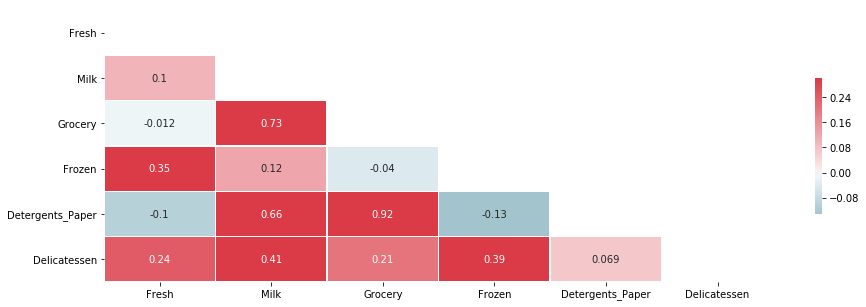

In [6]:
# Compute the correlation matrix
corr= data.corr()

# Generate a mask 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=False, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

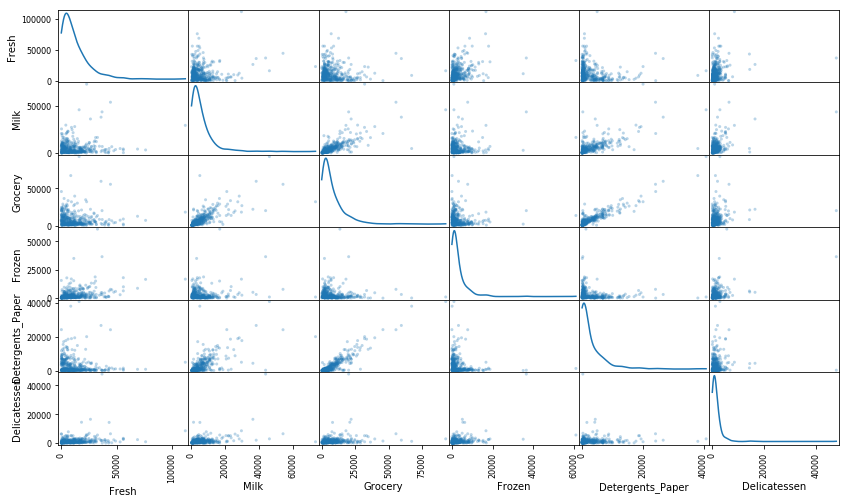

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

***Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.***

In [8]:
 clr  =  [ '#12efff' ,  '#abc222' ,  '#00ef00',  '#ffa700' ,  '#d62d20' ,  '#a200ff']
def graph_evolution_data(values):

   #Distribution and bias
    plt.subplots(figsize=(15,10))
    plt.figure(1)
    plt.suptitle(u'Distribution of the  features values. \n' 'Note: Solid vertical line represents mean, dashed line represents median.')

    for k, var in enumerate(feature_list):
        plt.subplot(3,3,1 + k)
        sns.distplot(values[var], color =clr[k])
        plt.axvline(values[var].mean(), color='#000000', linestyle='solid', linewidth=1)
        plt.axvline(values[var].median(), color='#000000', linestyle='dashed', linewidth=1)

    #Outliers
    plt.figure(figsize = (15,5))
    ax1=plt.subplot(1,2,1)
    _= sns.boxplot(data=values, orient='h', palette=clr,ax=ax1)
    plt.suptitle("Outliers")

    #Values range
    ax2=plt.subplot(1,2,2)
    _ = sns.barplot(data=values, palette=clr,ax=ax2)
    plt.suptitle("Values Range")



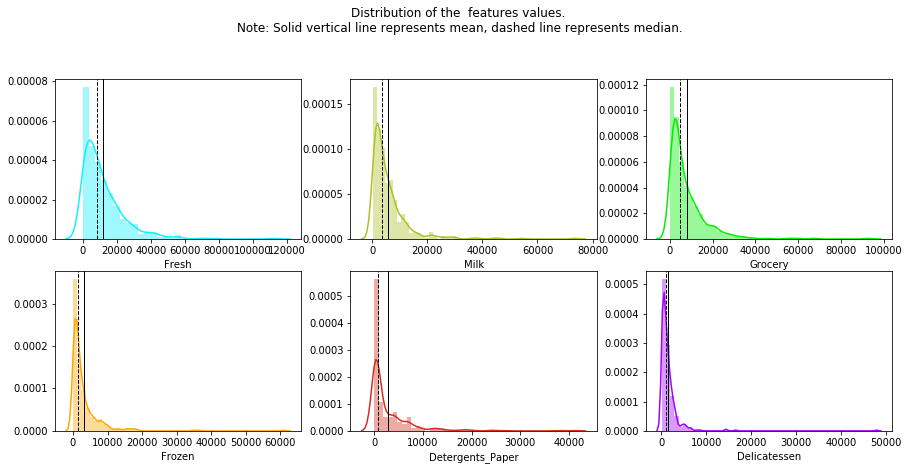

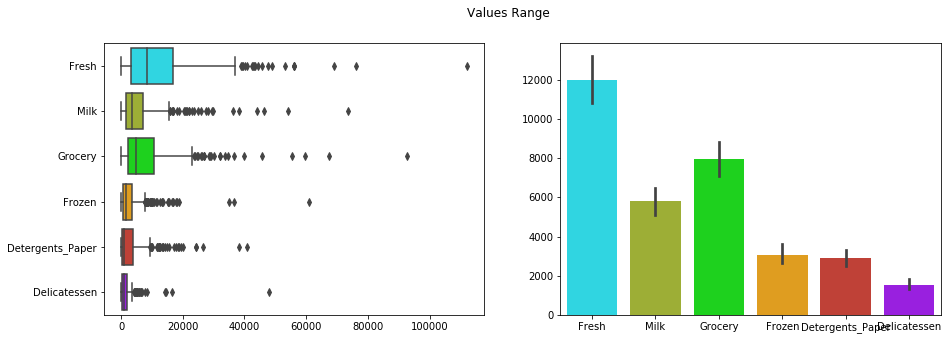

In [9]:
#show actual data graphs
graph_evolution_data(data)

From the above visualization:

We could clearly see that the data is not normally distributed for any of the features(Grahp 1). Most of the data for all the features lies near zero and is heavily right skewed. 

Also from the boxplot(Graph 2) we can see that there are many outliers for each of the features and for each feature the cause the distributions are skewed right.

Moreover the range of values (Graph 3) for each of the features vary a lot. For example, range value of "Fresh"  could be dominate all features.

***Are there any pairs of features which exhibit some degree of correlation?***


No handlers could be found for logger "matplotlib.legend"


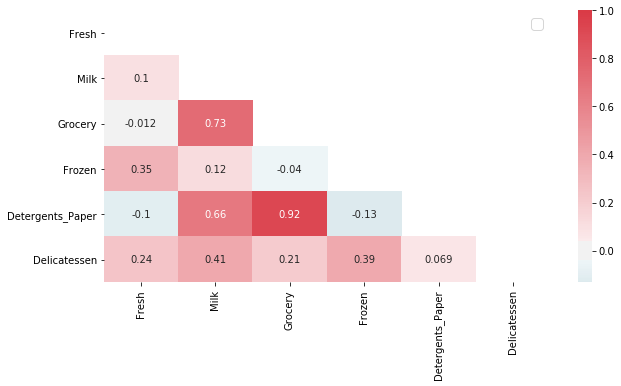

In [10]:
# Display the correlation heatmap
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr,mask=mask, cmap=cmap, annot=True,center=0,square=False)
ax.legend(loc=0, prop={'size': 15})

Start |End | Classification
--- | --- | --- | --- | ---
(+-) 0.00|(+-) 0.09|Zero correlation.
(+-) 0.10|(+-) 0.19|Very weak correlation.
(+-) 0.20|(+-) 0.49|Weak correlation.
(+-) 0.50|(+-) 0.69|Moderate correlation.
(+-) 0.70|(+-) 0.84|Significant correlation.
(+-) 0.85|(+-) 0.95|Strong correlation.
(+-) 0.96|(+-) 1.0 |Perfect correlation.


***We can see:***

Relation |Classification |Interpretation
--- | --- | --- | --- | ---
***Grocery and Detergents_paper***|Strong correlation| Hight spending on Grocery corresponds to hight spending on detergents_paper.
***Milk and Detergents_paper***|Moderate correlation| Moderate spending on Milk corresponds to moderate spending on detergents_paper.
***Milk and Grocery***|Significant correlation | Significant spending on Milk corresponds to Significant spending on Grocery.
***Milk and Delicatessen***|Weak correlation | Weak spending on Milk corresponds to weak spending on Delicatessen.
***Fresh and Frozen***|Weak correlation | Weak spending on Fresh corresponds to weak spending on Frozen.
***Frozen and Delicatessen***|Weak correlation | Weak spending on Frozen corresponds to weak spending on Delicatessen.
***Fresh and Delicatessen***|Weak correlation | Weak spending on Fresh corresponds to weak spending on Delicatessen.

***Note:*** All the other combinations are irrelevants because they have very weak or zero correlation.


**How is the data for those features distributed?**

We can see that the data for these features is highly skewed right and not normaly distributed. Nevertheless Delicatessen has the Mean and the Median close to each other and this is indicative that the values could be better distributed than the other features. We need apply Neperian logarithm to each product to fix the skewed right and get something like normal distribution.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

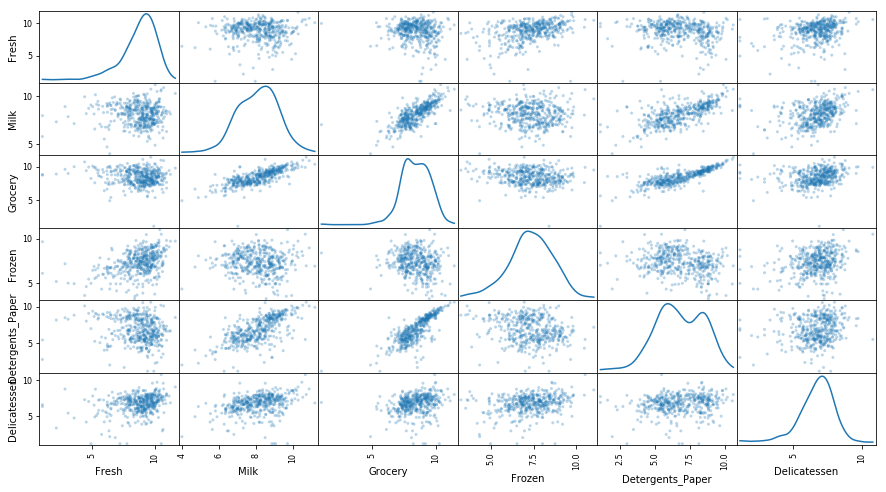

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (15,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156
2,8.068090,7.597396,7.494986,7.455877,5.455321,6.565265


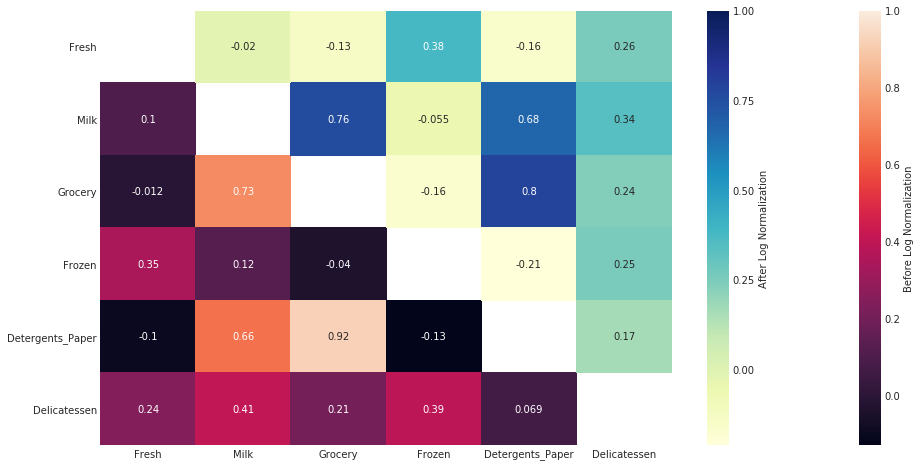

In [13]:
# Display the correlation heatmap
log_corr = log_data.corr()
f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'Before Log Normalization'})

mask2 = np.zeros_like(corr)
mask2[np.tril_indices_from(mask2)] = True
with sns.axes_style("white"):
    ax2 = sns.heatmap(log_corr, annot=True, mask=mask2, cmap="YlGnBu", cbar_kws={'label': 'After Log Normalization'})

***Observations:***

Start |End | Classification
--- | --- | --- | --- | ---
(+-) 0.00|(+-) 0.09|Zero correlation.
(+-) 0.10|(+-) 0.19|Very weak correlation.
(+-) 0.20|(+-) 0.49|Weak correlation.
(+-) 0.50|(+-) 0.69|Moderate correlation.
(+-) 0.70|(+-) 0.84|Significant correlation.
(+-) 0.85|(+-) 0.95|Strong correlation.
(+-) 0.96|(+-) 1.0 |Perfect correlation.


Relation |Classification before transformation |Classification after transformation |Observations
--- | --- | --- | --- | ---
***Grocery and Detergents_paper***|Strong correlation| Significant correlation.| The coefficient correlation changed from 0.92 to 0.8 and its classification changed too, this the unique case where classification change after the transformation.
***Milk and Detergents_paper***|Moderate correlation|Moderate correlation.|The coefficient correlation changed from 0.66 to 0.68 and its classification does not change.
***Milk and Grocery***|Significant correlation |Significant correlation.|The coefficient correlation changed from 0.73 to 0.76 and its classification does not change.
***Milk and Delicatessen***|Weak correlation |Weak correlation.|The coefficient correlation changed from 0.41 to 0.34 and its classification does not change.
***Fresh and Frozen***|Weak correlation |Weak correlation.|The coefficient correlation changed from 0.35 to 0.38 and its classification does not change.
***Frozen and Delicatessen***|Weak correlation |Weak correlation.|The coefficient correlation changed from 0.39 to 0.25 and its classification does not change.
***Fresh and Delicatessen***|Weak correlation |Weak correlation.|The coefficient correlation changed from 0.24 to 0.26 and its classification does not change.

***Note:*** All the other combinations are irrelevants because they have very weak or zero correlation.

From following graphs, we can see that after log transformation, the range value are more homogeneous and the presence the outliers should be have treatment. For example, "Fresh" has skewed  left and it has a lot outliers below percentil 25

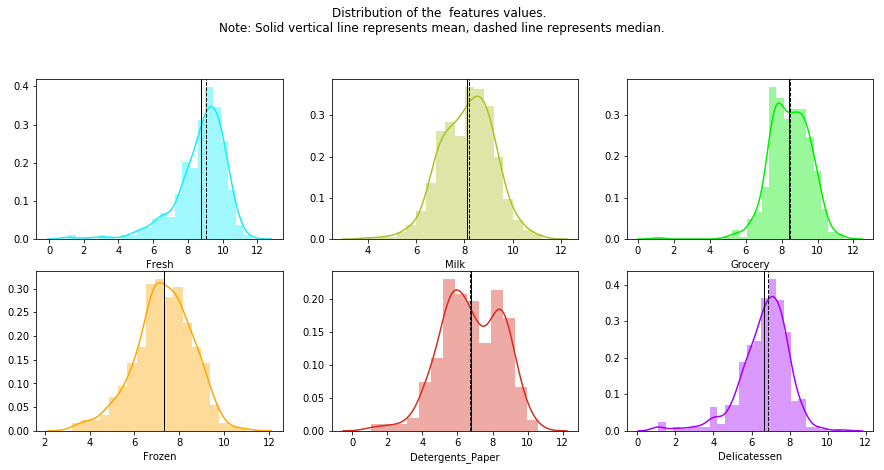

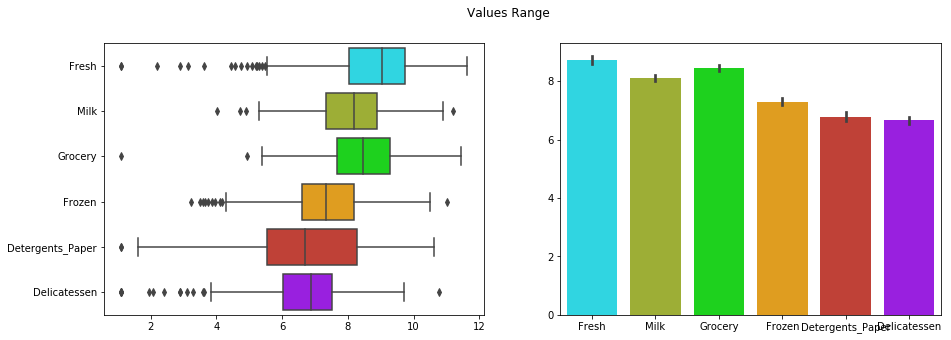

In [14]:
#show log data graphs
graph_evolution_data(log_data)

In [15]:
print "Before log transform"
feature_like_dependent_variable(data,data.shape[0])
print "After log transform"
feature_like_dependent_variable(log_data,data.shape[0])

Before log transform


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
R2,-10.690916,0.5956,0.018457,-0.029579,0.68757,0.367768
"max_depth ""Optimal Model""",2.000000,4.0000,1.000000,2.000000,3.00000,4.000000


After log transform


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
R2,-0.306623,0.613082,0.131595,0.108436,0.752303,0.573724
"max_depth ""Optimal Model""",4.000000,4.000000,1.000000,1.000000,4.000000,2.000000


***Observations:***

The R2 score that we are obtaining is increasing in the characteristics when they are  a dependent variable of the others ones. We can think that it could be because the gausian distribution of the variables and the impact to the coeffient correlation. For example, in the case of Milk we can see that R2 score is significant increased and he is good correlate with Detergents_paper and Grocery wich coefficient correlation is increasing after the transformation. See the table above where we compare the correlations change   after the transformation. Additionally we can see that the algoritm make half questions to get the R2 score to Milk.


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
import itertools #Functions creating iterators for efficient looping. More at https://docs.python.org/2/library/itertools.html

# The list of the indexes for data points that we wish to remove
all_indexes_outliers_data = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # So here, we're finding indexes from any points outside of Q1 - step and Q3 + step for each features
    outliers_indexes_feature = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)),:].index
    all_indexes_outliers_data.append(list(outliers_indexes_feature))  

        
# OPTIONAL: Select the indices for data points you wish to remove
iter_all_outliers_lst = list(itertools.chain.from_iterable(all_indexes_outliers_data))
#duplicate outliers
outliers = list(set([x for x in iter_all_outliers_lst if iter_all_outliers_lst.count(x) > 1]))



# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Duplicate outliers "
print outliers

# Sets are lists with no duplicate outliers entries
uniq_outliers = list(set(iter_all_outliers_lst))
print "All unique outliers"
print uniq_outliers 




Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Duplicate outliers 
[128, 65, 66, 75, 154]
All unique outliers
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

**Are there any data points considered outliers for more than one feature based on the definition above?**
  
  128:An outlier for Delicatessen and Fresh.
  
  65: An outlier for Frozen and Fresh.
  
  66: An outlier for Delicatessen and Fresh.
  
  75: An outlier for Detergents_Paper and Grocery.
  
  154:An outlier for Delicatessen, Milk and Grocery.

Note: Removing the 42 data points could cause us to lose important information necessary to correctly classify customer behavior. In fact some of these outliers may actually represent certain customer group behavior.

**Should these data points be removed from the dataset?**

They should be removed as they are not only outliers in one categories but more than once, so the the presence of outliers can often skew results which take into consideration these data points. Hence, they are not representative of our general customers.


**Further Readings**

http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

**Abstract Summary**

If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.
If the outlier does not change the results but does affect assumptions, you may drop the outlier. But note that in a footnote of your paper.

More commonly, the outlier affects both results and assumptions. In this situation, it is not legitimate to simply drop the outlier. You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed.

If the outlier creates a significant association, you should drop the outlier and should not report any significance from your analysis.

***If any data points were added to the outliers list to be removed, explain why.***

The five data points that were outliers for more than one feature were removed from the data set so that we do not build a clustering model on the skewed data. We clearly know that clustering algorithms are sensitive to noisy data and outliers. As we use SSE to choose the cluster center, outiers will pull the center towards them and the cluster center will not be a proper representation of the data.


***Observations***

***We can see from boxplot:***
  
"Fresh " missing three outliers. 

"Milk" missing one outlier. 

"Grocery" missing all its outliers. 

"Frozen" missing one outlier. 

"Detergents_paper" does not missing  outliers. 

"Delicatessen" missing three outliers.

***We can see from range value graphs*** not changed after outliers removed.

***We can see from correlation graph*** that some correlations have changed.

Start |End | Classification
--- | --- | --- | --- | ---
(+-) 0.00|(+-) 0.09|Zero correlation.
(+-) 0.10|(+-) 0.19|Very weak correlation.
(+-) 0.20|(+-) 0.49|Weak correlation.
(+-) 0.50|(+-) 0.69|Moderate correlation.
(+-) 0.70|(+-) 0.84|Significant correlation.
(+-) 0.85|(+-) 0.95|Strong correlation.
(+-) 0.96|(+-) 1.0 |Perfect correlation.


Relation |Classification with outliers |Classification without outliers |Observations
--- | --- | --- | --- | ---
***Grocery and Detergents_paper***|Significant correlation.|Significant correlation. | The coefficient correlation changed from 0.8 to 0.79 and its classification does not change.
***Milk and Detergents_paper***|Moderate correlation|Moderate correlation|The coefficient correlation changed from 0.68 to 0.67 and its classification does not change.
***Milk and Grocery***|Significant correlation |Significant correlation|The coefficient correlation changed from 0.76 to 0.78 and its classification does not change.
***Milk and Delicatessen***|Weak correlation |Weak correlation|The coefficient correlation changed from 0.34 to 0.33 and its classification does not change.
***Fresh and Frozen***|Weak correlation |Weak correlation|The coefficient correlation changed from 0.38 to 0.35 and its classification does not change.
***Frozen and Delicatessen***|Weak correlation |Weak correlation|The coefficient correlation changed from 0.25  to 0.23 and its classification does not change.
***Fresh and Delicatessen***|Weak correlation |Weak correlation|The coefficient correlation changed from 0.26  to 0.21 and its classification does not change.

***Note:*** All the other combinations are irrelevants because they have very weak or zero correlation.


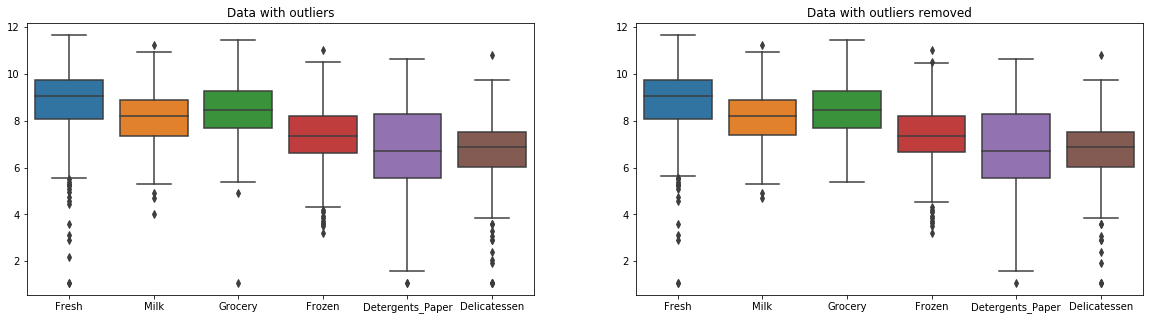

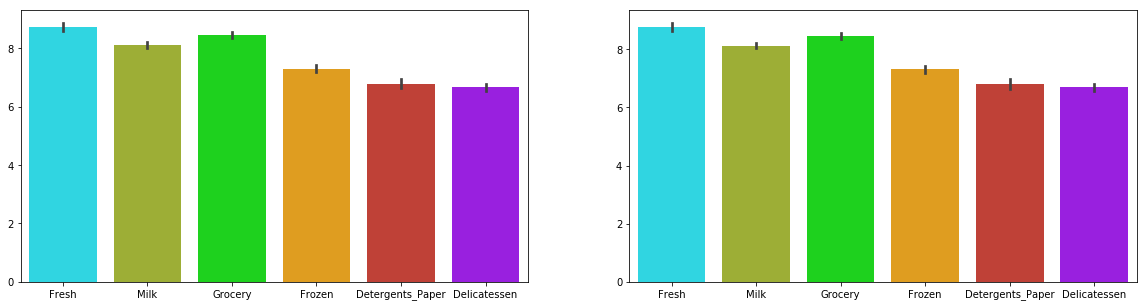

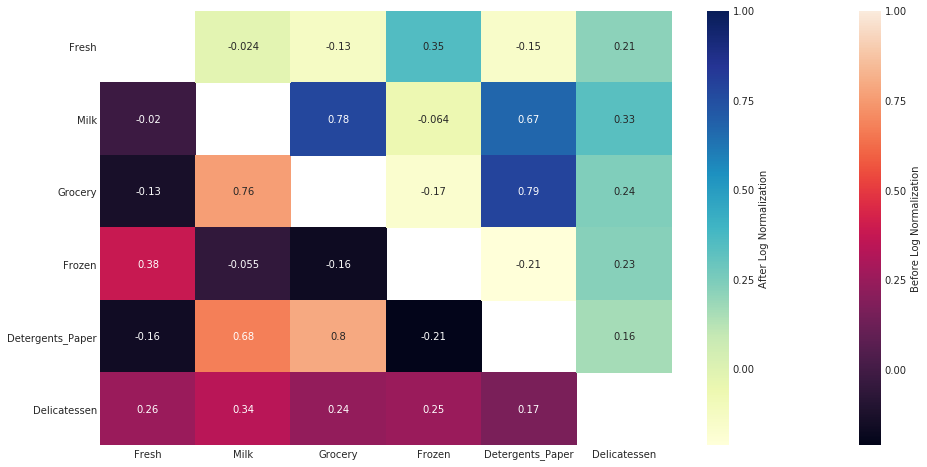

In [17]:
# Set up the matplotlib figure
plt.subplots(figsize=(20, 5))
plt.figure(1)
for k in range(2):     
    plt.subplot(1,2,2 - k)   
    if k==1:
        plt.title('Data with outliers')
        _ = sns.boxplot(data=log_data) 
       
    else:
        plt.title('Data with outliers removed')
        _ = sns.boxplot(data=good_data)
#Values range
plt.figure(2,figsize = (20,5))
ax3=plt.subplot(1,2,1)
_ = sns.barplot(data=log_data, palette=clr,ax=ax3)

ax4=plt.subplot(1,2,2)
_ = sns.barplot(data=good_data, palette=clr,ax=ax4)

#Display the correlation heatmap
corr = log_data.corr()
good_data_corr = good_data.corr()

f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'Before Log Normalization'})

mask2 = np.zeros_like(corr)
mask2[np.tril_indices_from(mask2)] = True
with sns.axes_style("white"):
    ax2 = sns.heatmap(good_data_corr, annot=True, mask=mask2, cmap="YlGnBu", cbar_kws={'label': 'After Log Normalization'})


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

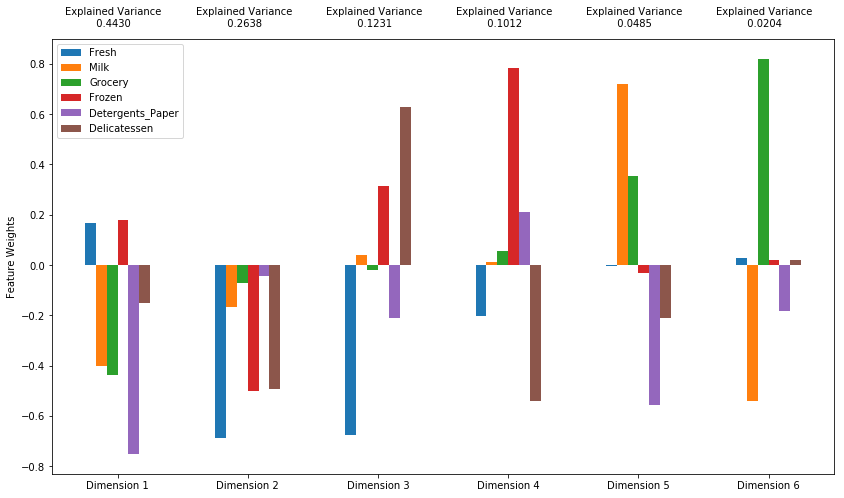

In [18]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns), random_state=10).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)



### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

**How much variance in the data is explained in total by the first and second principal component?**


In [19]:
print "The variance in the data is explained by the first and second principal components is:{:.2f}%".format( (sum([pca.explained_variance_ratio_[i] for i in range(2)]))*100)

The variance in the data is explained by the first and second principal components is:70.68%


**How much variance in the data is explained by the first four principal components?**

In [20]:
print "The variance in the data is explained by the first four principal components is:{:.2f}%".format( (sum([pca.explained_variance_ratio_[i] for i in range(4)]))*100)

The variance in the data is explained by the first four principal components is:93.11%


**Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.**

**Note:** [A good video to explain PCA](https://www.youtube.com/watch?v=FgakZw6K1QQ)

Dimension |% Explained Variance | Irrelevant Products | Relevant Product | Comments
--- | --- | --- | --- | ---
***Dimension 1 or First Principal Componet*** |44.30%|Delicatessen, Fresh and Frozen have an small roll explaining the variation on PC1. |Detergents_Paper will have a greater impact followed by Grocery and Milk respectively. So, these features best represent PC. | This first PC explains a strong correlation between these features as was observed earlier. An increase in PC1 is associated with an high purchase cost for 'Detergents_Paper' followed by 'Grocery' and 'Milk' and this could be a 'Retailer'.
***Dimension 2 or Second Principal Componet*** | 26.38% |Milk,Grocery,Detergents_Paper have an small roll explaining the variation on PC2 |The Fresh, Frozen and  Delicatessen have sizable roles in explaining the variation in Dimension 2.Fresh will have a greater impact followed by Frozen and Delicatessen respectively. So, these features best  represent PC.|  An increase in PC2 is associated with an high purchase cost for 'Fresh' followed by 'Frozen' and 'Delicatessen' and this could be a 'Cafe/Restaurant'.***Note:*** We can easily see the orthogonal aspect of dimension 2 with respect to dimension 1, where now the greater weights in the products correspond to the products that had lower weights in dimension 1 and that were taken as insignificant impact. The explained variance of dimension 2 picks up the best it can in relation to what is left out of dimension 1.
***Dimension 3 or Third Principal Componet*** | 12.31% | Milk,Grocery,Frozen and  Detergents_Paper have an small roll explaining the variation on PC3 |The Fresh and Delicatessen have sizable roles in explaining the variation in Dimension 3.Fresh will have a major slight  impact more than Delicatessen. So, these features best represent PC.|  An increase in PC3 is associated with an high purchase cost for 'Fresh' followed by 'Delicatessen' and this could be a 'butcher or fish shop'.
***Dimension 4 or Fourth Principal Componet*** | 10.12% | Fresh,Milk,Grocery and  Detergents_Paper have an small roll explaining the variation on PC4 |The Frozen and Delicatessen have sizable roles in explaining the variation in Dimension 4. Frozen will have a greater impact followed by Delicatessen. So, these features best represent PC.| An increase in PC4 is associated with an high purchase cost for 'Frozen' followed by 'Delicatessen' and this could be a 'fast food restaurant'.


In [21]:
display(pca_results)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display the log-transformed sample data
display(np.round(log_samples, 4))


# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.4457,9.3142,10.0857,6.6682,9.1621,4.2767
1,10.3295,8.8831,8.4964,9.8369,6.6373,7.9642
2,8.0681,7.5974,7.4950,7.4559,5.4553,6.5653


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.1072,2.7017,-0.6386,1.8708,0.6452,0.1333
1,0.3219,-3.0789,0.5948,0.9431,0.2931,-0.2263
2,1.5715,0.6914,0.7154,-0.0264,0.0495,-0.2803


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [23]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=0).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.1072,2.7017
1,0.3219,-3.0789
2,1.5715,0.6914


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

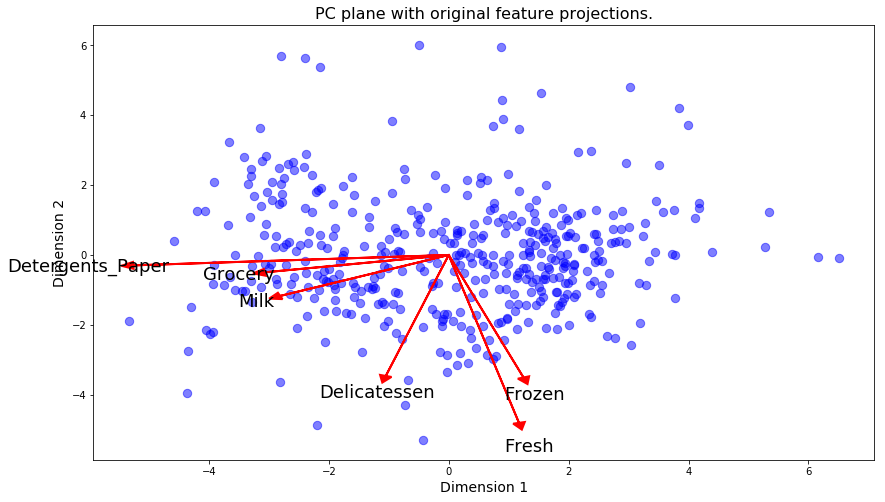

In [25]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)


### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

***Answers:***

***Note:*** A easy explanation about how interpret [bitplot](https://www.youtube.com/watch?v=amCxpfRi2Hs)

***From the biplot, which of the original features are most strongly correlated with the first component?***

Detergents_paper,Grocery and Milk.

***What about those that are associated with the second component?***

Fresh and Frozen.

***Do these observations agree with the pca_results plot you obtained earlier?***

  Yes,they does. We can see from below plot that these observations are agree with the pca_results plot that we  obtained earlier.


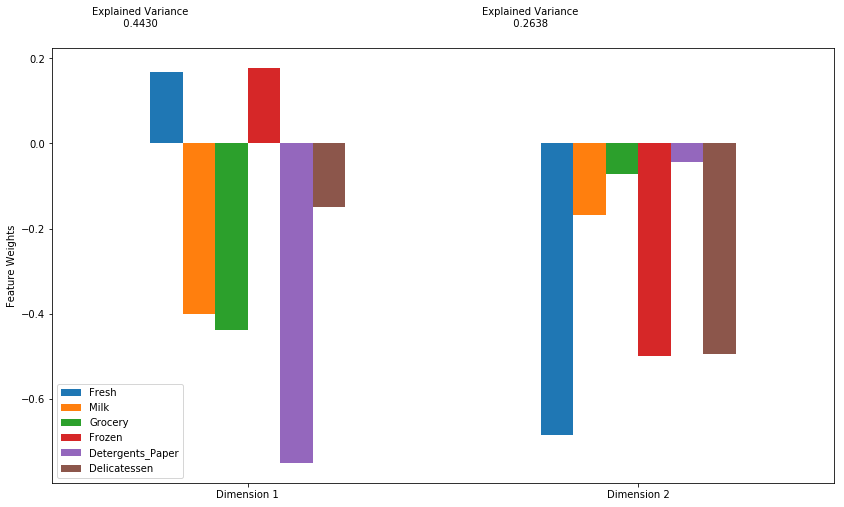

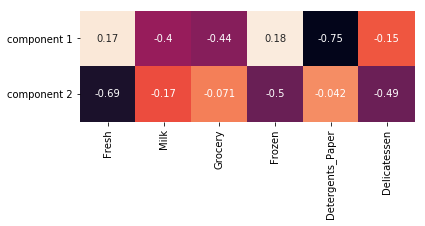

In [26]:
vs.pca_results(good_data, pca)

component = ['component {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
components.index = component

plt.figure(2)
sns.heatmap(components,
            square=True, annot=True, cbar=False)


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

Algorithm |Assignment | Advantages| Disadvantage 
--- | --- | --- | --- | ---
***K-Means Clustering*** |Hard assignment:Points belong explicitly to clusters| ***1.***  Easy to understand and implement. ***2.***  Works well in practice.| ***1.***  It may converge to a local optima depending on your initialization of clusters.So,We can initialize multiple times. ***2.***  It may be computationally expensive to compute Euclidean distances.Yet we can easily use batch K-means to solve this. ***3.***  It is susceptible to outliers.We can pre-process our data to exclude outliers to solve this. 
***Gaussian Mixture Model*** | Soft assignment: ***1.*** There is no definite assignment of points to clusters. ***2.*** Points have probabilities of belonging to clusters. |***1.*** There is greater flexibility due to clusters having unconstrained covariances.***2.*** It allows mixed memberships. Due to the nature of soft assignments, a point can belong to two clusters with varying degree (probability). |***1.*** Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high. ***2.*** It may converge to a local optima depending on your initialization of clusters. So,We can initialize multiple times. ***3.*** It is a much more complicated model to interpret.


An intuitive example about differences between hard clustering and soft clustering :

Here's a picture from the internet to help understand k-means.

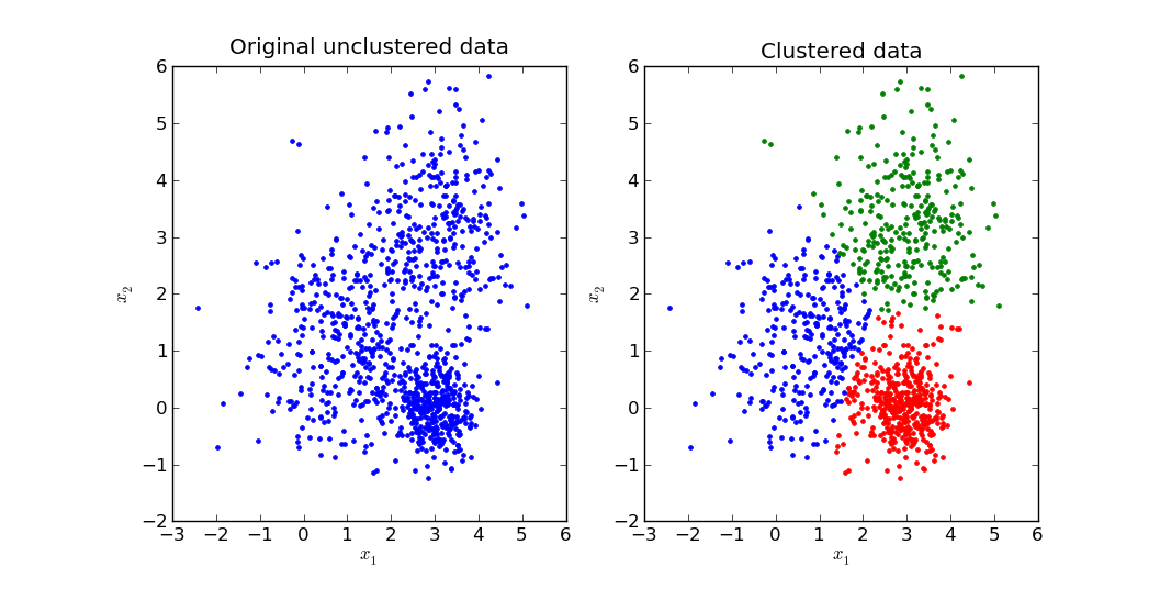

In [27]:
import matplotlib.image as img

%matplotlib inline

plt.figure(figsize=(20, 40))
plt.axis("off")
plt.imshow(img.imread(fname='kmeans.png'))
plt.show()

Now, the figure to the left shows some unclustered data. K-means/Mixture of Gaussians tries to break them into clusters.

Let's says we are aiming to break them into three clusters, as above. K means will start with the assumption that a given data point belongs to one cluster.

Choose a data point. At a given point in the algorithm, we are certain that a point belongs to a red cluster. In the next iteration, we might revise that belief, and be certain that it belongs to the green cluster. However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment".

What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to the red cluster, but also 10% chance its in green, 20% chance it might be blue. That's a soft assignment. The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments. As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.

***References:***

[https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)



[http://arnoldit.com/wordpress/2016/11/17/hard-and-soft-clustering-explained/](http://arnoldit.com/wordpress/2016/11/17/hard-and-soft-clustering-explained/)

[http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html)



***Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?***

From the biplot,we can see not form clearly deliniated clusters as certain points seem to be in the border bettween two or more groups. We can also observe that certain dimensions in the data (i.e. Milk-Grocery-Detergents and Fresh-Frozen) have a strong degree of correlation between each other. Due to how there may be a mixed membership problem in our dataset where there is no clear demarcation, ***A priori,I believe we should start with the Gaussian Mixture Model, nevertheless we need evaluate more how the two clustering algoritm works with the data. An Silhouette analysis would be a good idea to know how much values negatives of coefficient Silhouette each algorithm have done when is clustering.***


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

***I will test hard clustering (kMeans) and soft clustering (Gaussian Mixture Model)***

In [28]:
# Imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [29]:
# Create range of clusters 
list_n_clusters = list(range(2,7))
print("The two implementations will be testing with a list tha include 5 diferentes clusters sizes:")
print (list_n_clusters)

The two implementations will be testing with a list tha include 5 diferentes clusters sizes:
[2, 3, 4, 5, 6]


***Implementation to evaluate result from the two clustering algorithms***

In [30]:
def Function_Clustering(algorith,values):
    # Loop through clusters
    results = []
    for n_clusters in list_n_clusters:
        
        if algorith=='KNN':        
            # TODO: Apply your clustering algorithm of choice to the reduced data 
            clusterer = KMeans(n_clusters=n_clusters,random_state=10).fit(values)     

            # TODO: Find the cluster centers
            centers = clusterer.cluster_centers_
        
        elif  algorith=='GMM':
        
             # TODO: Apply your clustering algorithm of choice to the reduced data 
            clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(values)    

            # TODO: Find the cluster centers
            centers = clusterer.means_
        

         # TODO: Predict the cluster for each data point
        preds = clusterer.predict(values)
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(values, preds, metric='euclidean')

        results.append({'Clusters':n_clusters,'silhouette_score':round(score,4)})
   
    return results

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Report the silhouette score for several cluster numbers you tried.

**Note:** I am evaluating the best option to clustering between kmeans and Gaussian Mixture Model.

In [31]:
# Collect results 
results = {}
results['KNN'] = {}
results['KNN']= Function_Clustering('KNN',reduced_data)
results['GMM'] = {}
results['GMM'] = Function_Clustering('GMM',reduced_data)
#show results
for i in results.items():
    print i[0]
    display(pd.DataFrame(i[1]))
        

    

KNN


,Clusters,silhouette_score
0,2,0.4263
1,3,0.3903
2,4,0.3329
3,5,0.3522
4,6,0.3646


GMM


,Clusters,silhouette_score
0,2,0.4219
1,3,0.3755
2,4,0.2933
3,5,0.3185
4,6,0.2943


***Of these, which number of clusters has the best silhouette score?***

  The best silhouette score is 0.4263 from Kmeans. We can see both models have ***the best cluster number equal "2"***, nevertheless Gaussian Mixture Model has a slightly lower coefficient with the same cluster number.
  
  Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. To know more, visit the literature [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).
  
  In question 6 I answered in the part where  asked me "Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?":
  
 "... I believe we should start with the Gaussian Mixture Model."
 
 After below result, we can see that ***the best option is Kmeans algorithm***. It has a short negative tail in cluster 1 and nothing in cluster 2. GMM has poor performance in front of kmeans.
  
**Note:** I am evaluating the best option to clustering between kmeans and Gaussian Mixture Model. The following code can be used to Silhouette analysis study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [32]:
###########################################
#This is modified code from original code at: 
#http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

def silhouette_score_graph(range_n_clusters,algorith,values):
    
    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(values.index) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if algorith=='KNN':        
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
            cluster_labels = clusterer.fit_predict(values)  
                 
        elif  algorith=='GMM':
            clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(values)
            cluster_labels = clusterer.predict(values)
        

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(values, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", round(silhouette_avg,4))

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(values, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(values['Dimension 1'], values['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        
        # Labeling the clusters
        if algorith=='KNN':            
            centers = clusterer.cluster_centers_
            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        elif  algorith=='GMM':
            centers = clusterer.means_
            plt.suptitle(("Silhouette analysis for Gaussian Mixture Model clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
           
       
        
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st component")
        ax2.set_ylabel("Feature space for the 2nd component")

        plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.4263)


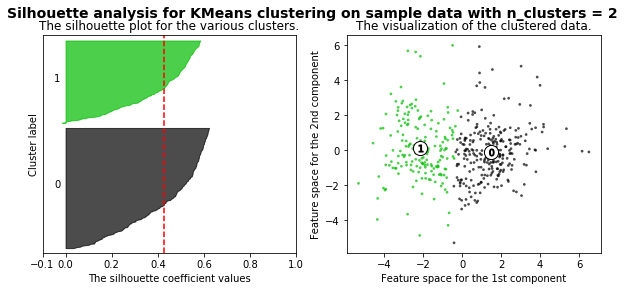

('For n_clusters =', 2, 'The average silhouette_score is :', 0.4219)


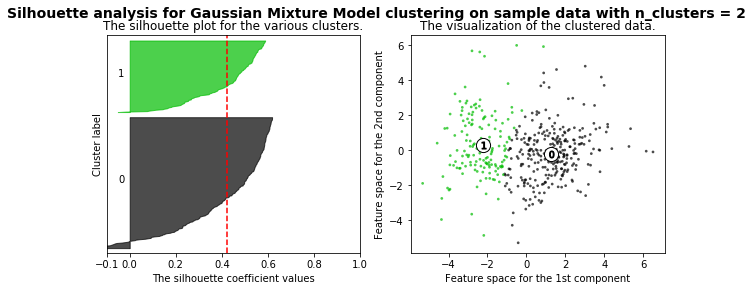

In [33]:
best_nCluester=[2]
silhouette_score_graph(best_nCluester,'KNN', reduced_data)
silhouette_score_graph(best_nCluester,'GMM', reduced_data)

#To see all graphs for each algoritm, uncomment the lines below
#silhouette_score_graph(list_n_clusterss,'KNN')
#silhouette_score_graph(list_n_clusters,'GMM')


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [34]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = KMeans(n_clusters=2, random_state=10).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)


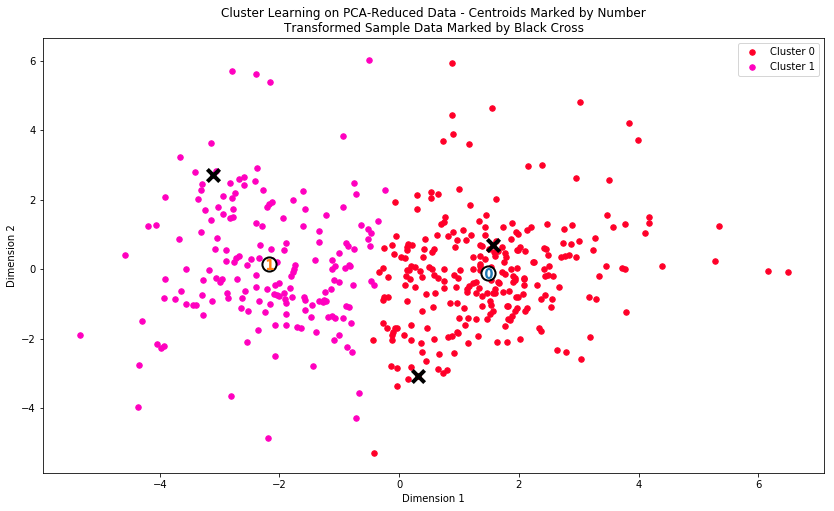

In [35]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)


### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [36]:
#TODO: Inverse transform the centers
log_centers = pca.inverse_transform (centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

We will use desviation from median, with reference the statistical description of the dataset at the beginning of this project. Because ***mean is sensitive to outliers and this dataset has 10% of outliers, we  used the median.***




***Segment 0:***
Establishments in this segment have above median spending on "Fresh" and "Frozen".
This could represent Cafe/restaurant.

***Segment 1:***
Establishments in this segment have above median spending on "Milk", "Grocery" and "Detergents_Paper".
This segment could be represented like Retailers.




In [37]:
print "Center of the clusters. Deviation from median" 
display(true_centers - data.median())
print "Center of the clusters. Deviation from mean"
display(true_centers - data.mean())


Center of the clusters. Deviation from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2278.5,562.0,-522.5,-284.5
Segment 1,-4499.0,4273.0,7348.5,-574.0,3744.5,70.5


Center of the clusters. Deviation from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.297727,-3899.265909,-5474.277273,-983.931818,-2587.493182,-843.870455
Segment 1,-7995.297727,2103.734091,4152.722727,-2119.931818,1679.506818,-488.870455


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 0)
('Sample point', 2, 'predicted to be in Cluster', 0)


**Answer:**

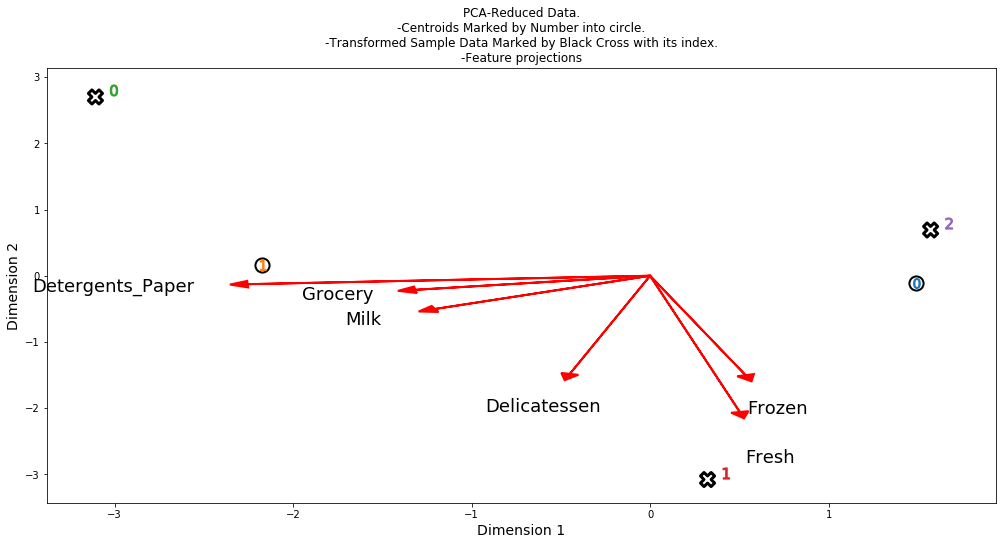

In [39]:
import matplotlib.cm as cm
def cluster_vector_results(centers, pca_samples,good_data,cmap, arrow_size,text_pos):
    '''
    Visualization in two dimensions for cluster centers, selected sample data and the projected features.
    '''
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (17,8))
    plt.figure(1,2,1)
    # Color map
   # cmap = cm.get_cmap('gist_rainbow')
    
    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

       
    # Plot transformed sample points   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
                   s = 200, linewidth = 3, color = 'black', marker = 'X', facecolors = 'none');
        ax.scatter(x = sample[0]+0.1, y = sample[1]+0.1, marker='$%d$'%(i), alpha = 1, s=125);
   
    # projections of the original features
    feature_vectors = pca.components_.T
    # we use scaling factors to make the arrows easier to see
    #arrow_size, text_pos = 3.0, 4.0,
    for i, v in enumerate(feature_vectors):
            ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.1, head_length=0.1, linewidth=2, color='red')
            ax.text( text_pos*v[0],  text_pos*v[1], good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)
    
    
    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    # Set plot title
    ax.set_title("PCA-Reduced Data.\n-Centroids Marked by Number into circle.\n-Transformed Sample Data Marked by Black Cross with its index.\n-Feature projections");

cluster_vector_results(centers, pca_samples,good_data,cm.get_cmap('gist_rainbow'),3.0,4.0)



***We know about the two segment , where its  cluster centers  are represented by circle:***
 


***Segment 0:*** Establishments in this segment have above median spending on "Fresh" and "Frozen". This could represent Cafe/Restaurant.

***Segment 1:*** Establishments in this segment have above median spending on "Milk", "Grocery" and "Detergents_Paper". This segment could be represented like Retailers.


***And the values for each sample:***

Index |Fresh | Milk| Grocery|Frozen|	Detergents_Paper|	Delicatessen|Segment
--- | --- | --- | --- | ---
***0*** |630|11095|23998|787|9529|72|1
***1*** |30624|7209|4897|18711|763|2876| 0
***2*** |3191|1993|1799|1730|234|710| 0


***Sample 0:***

It is evident that this belongs to cluster 1 (segment 1) where "Milk", "Grocery" And "Detergents_Paper" have high spending value.

***Sample 1 and Sample 2:***

  It is evident that they belongs to cluster 0. "Fresh" and "Frozen" have high spending value. Nevertheless, Sample 1 has hight spending on Delicantessen and this mark the diference between Cafe or Restaurant.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

  We can hope after result below that in general the change will be accept, according with de assumptions a priori.

In [40]:
import ab_exp as ab #This library was obtain from http://www.claudiobellei.com/2017/11/02/bayesian-AB-testing/

### The new DataFrame with the target variable###
market = pca.inverse_transform (reduced_data)
df_market=  np.exp(pd.DataFrame(market,columns = list(good_data.keys())))

df_preds=pd.DataFrame({'Segment':preds }) 
df_segment_data = pd.concat([df_market, df_preds], axis = 1)

df_segment_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Segment
0,4748.627675,6853.222409,10195.908893,1103.730023,3359.645075,1046.305633,1
1,8302.279951,7960.488913,10952.468176,1656.412488,3560.059455,1577.803427,1
2,14019.161034,9431.840407,12069.779143,2414.877216,3952.418003,2360.943779,1
3,20414.737612,2696.194215,3144.750730,3766.279265,399.636101,1360.467691,0
4,29073.378778,6931.364095,7890.430605,4372.935333,1790.661556,2966.383642,1
5,6683.684401,5531.356518,7774.031727,1470.811514,2055.147311,1115.685933,1
6,4435.330530,5102.557883,7601.599035,1087.778358,2071.318015,840.171563,1
7,9156.809415,7392.338159,10002.474077,1801.365511,3025.744702,1594.739325,1
8,3518.989907,4289.148992,6578.368389,932.492015,1668.517741,661.943527,1
9,6311.711778,12029.880180,17448.554060,1276.175519,7997.590226,1736.695797,1


In [41]:
from sklearn.utils import shuffle

np.random.seed(2018)
# Number of random draws from the prior
n_draw = 100000
# Defining the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw))

# Defining the generative model
def gen_model(prob,muestra):
   
    return(np.random.binomial(muestra, prob))

#simulator
def simulator_data(muestra,observed_data=None):
    #  the generative model data
    allow_change = list()
    
    # Simulating the data
    for p in prior_rate:
        allow_change.append(gen_model(p, muestra))
    
   
    # Here I filter off all draws that do not match the data.
    post_rate_values = prior_rate[list(map(lambda x: x == observed_data, allow_change))]
    return post_rate_values

def visual_hist(posterior):
    
    ax=plt.subplot()
    posterior.hist(figsize=(15,5)) # Eyeball the posterior with frecuency and rate approved
    ax.set(xlabel='conversion rate', ylabel='density')



#filtering segments 0 from data    
segment_0 = df_segment_data[df_segment_data['Segment']==0]

#filtering segments 1 from data  
segment_1 = df_segment_data[df_segment_data['Segment']==1]


## Segment 0

**Suppose that a survey of 155 clients (representative sample) of segment 0 resulted in 59 clients approving the change.**

Data SEGMENT 0
Number of draws left: 645, 
Posterior mean: 0.382, 
Posterior median: 0.380, 
Posterior 95% quantile interval: 0.308-0.452


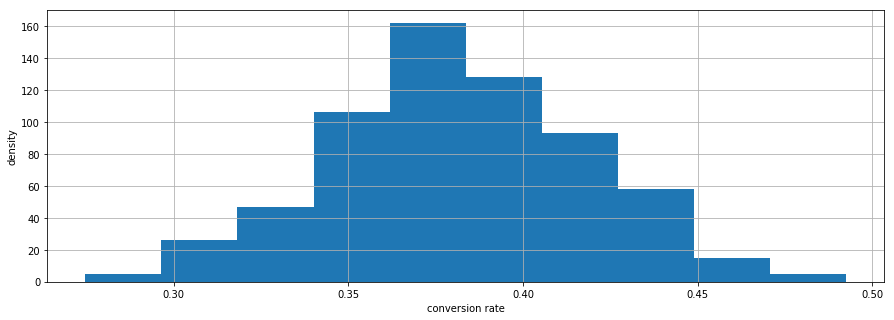

In [42]:
# Getting significan samples from segment 0

#Margen: 5%
#Nivel de confianza: 95%
#Poblacion: 258 => rows from segment_0
#Sample: 155
df_sample_s0= (shuffle(segment_0)).head(155)

#Simulating data SEGMENT 0
# from marketing "we know" that 155 customers from  a sample size of 59, accept the change after customer survey.
post_rate_segment_0 = simulator_data(df_sample_s0.shape[0],59)
visual_hist(post_rate_segment_0)
print "Data SEGMENT 0"
print('Number of draws left: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_segment_0), post_rate_segment_0.mean(), post_rate_segment_0.median(), post_rate_segment_0.quantile(.025), post_rate_segment_0.quantile(.975)))


**Test A:** Accept delivery service from currently 5 days a week to 3 days a week.

**Test B:** Does not accept delivery service from currently 5 days a week to 3 days a week.

We generate some random data. For this example, we are going to take the "posterior mean" for the segment.

So, the A variant does better than the B variant by picking values from a Bernoulli distribution with mean values of 0.382 and 0.10, respectively:

()
*** abyes ***
()
Method = analytic
Decision Rule = loss
Threshold of Caring = 0.01
Decision Variable = lift
()
* Result is conclusive: A variant is winner!
()


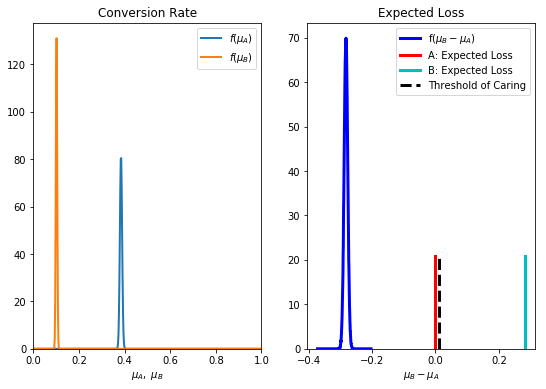

In [43]:
test_a = np.random.binomial(1,0.382, size=10000)
test_b=  np.random.binomial(1,0.10, size=10000)

segment_0 = [test_a,test_b]
# --- ANALYTIC METHOD ---
# To know more about Analytic method, loss decision rule, lift decision variable, visit http://www.claudiobellei.com/2017/11/02/bayesian-AB-testing/
exp = ab.AbExp(alpha=0.95, method='analytic', rule='loss', decision_var='lift', plot=True)
exp.experiment(segment_0)

Figure (a) Posterior distributions of the mean values, μA and μB, for the A and B variants. 

Figure (b) Posterior distribution of the expected loss. 

**Conclusion:** Because the expected loss for the A variant (red vertical line) is smaller than the threshold of caring (black broken vertical line), we declare the experiment conclusive and A the winning variant.

 We will hope a priori the segment 0 accept the change.


## Segment 1

***Suppose that a survey of 86 clients (representative sample) of segment 1 resulted in 20 clients approving the change.***

Data SEGMENT 1
Number of draws left: 1120, 
Posterior mean: 0.240, 
Posterior median: 0.238, 
Posterior 95% quantile interval: 0.161-0.331


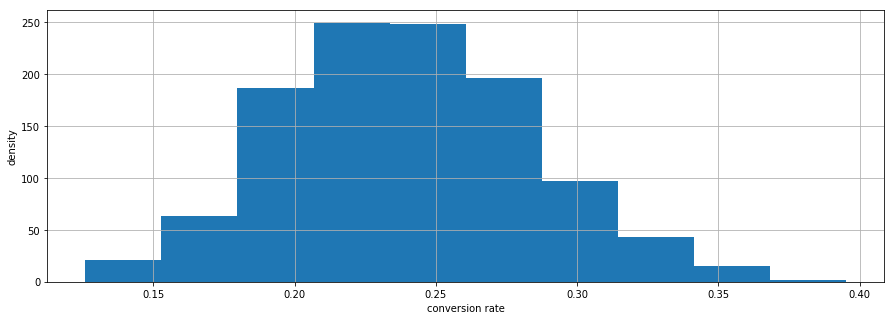

In [44]:
# Getting significan samples from segment 0

#Margen: 5%
#Nivel de confianza: 95%
#Poblacion: 177 => rows from segment_1
#Sample: 86
df_sample_s1 = (shuffle(segment_1)).head(86)

#Simulating data SEGMENT 1
# from marketing "we know" that 20 customers from  a sample size of 86, accept the change

post_rate_segment_1 = simulator_data(df_sample_s1.shape[0],20)
visual_hist(post_rate_segment_1)
print "Data SEGMENT 1"
print('Number of draws left: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_segment_1), post_rate_segment_1.mean(), post_rate_segment_1.median(), post_rate_segment_1.quantile(.025), post_rate_segment_1.quantile(.975)))


**Test A:** Accept delivery service from currently 5 days a week to 3 days a week.

**Test B:** Does not accept delivery service from currently 5 days a week to 3 days a week.

We generate some random data. For this example, we are going to take the ***"posterior mean"*** of the segment.

So, the A variant does better than the B variant by picking values from a Bernoulli distribution with mean values of 0.240 and 0.08, respectively:

()
*** abyes ***
()
Method = analytic
Decision Rule = loss
Threshold of Caring = 0.01
Decision Variable = lift
()
* Result is conclusive: A variant is winner!
()


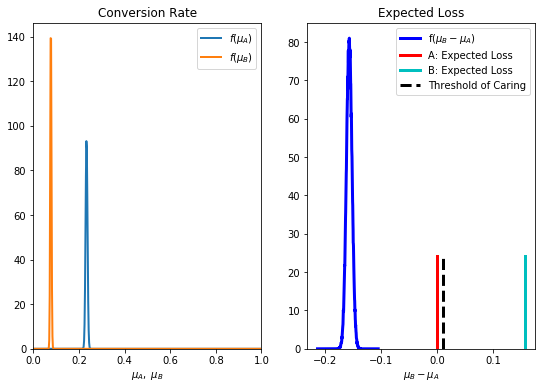

In [45]:
test_a = np.random.binomial(1,0.240, size=10000)
test_b=  np.random.binomial(1,0.080, size=10000)

segment_1 = [test_a,test_b]
# --- ANALYTIC METHOD ---
# To know more about Analytic method, loss decision rule, lift decision variable, visit http://www.claudiobellei.com/2017/11/02/bayesian-AB-testing/
exp = ab.AbExp(alpha=0.95, method='analytic', rule='loss', decision_var='lift', plot=True)
exp.experiment(segment_1)

Figure (a) Posterior distributions of the mean values, μA and μB, for the A and B variants. 

Figure (b) Posterior distribution of the expected loss. 

**Conclusion:** Because the expected loss for the A variant (red vertical line) is smaller than the threshold of caring (black broken vertical line), we declare the experiment conclusive and A the winning variant.

 We will hope a priori the segment 1 accept the change.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

   We can use 'customer segment' like target variable.
   We can see below an example supervised learner (Suport Vector Machine) to predict the target variable.

In [46]:
### The new DataFrame with the target variable###
df_segment_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Segment
0,4748.627675,6853.222409,10195.908893,1103.730023,3359.645075,1046.305633,1
1,8302.279951,7960.488913,10952.468176,1656.412488,3560.059455,1577.803427,1
2,14019.161034,9431.840407,12069.779143,2414.877216,3952.418003,2360.943779,1
3,20414.737612,2696.194215,3144.750730,3766.279265,399.636101,1360.467691,0
4,29073.378778,6931.364095,7890.430605,4372.935333,1790.661556,2966.383642,1
5,6683.684401,5531.356518,7774.031727,1470.811514,2055.147311,1115.685933,1
6,4435.330530,5102.557883,7601.599035,1087.778358,2071.318015,840.171563,1
7,9156.809415,7392.338159,10002.474077,1801.365511,3025.744702,1594.739325,1
8,3518.989907,4289.148992,6578.368389,932.492015,1668.517741,661.943527,1
9,6311.711778,12029.880180,17448.554060,1276.175519,7997.590226,1736.695797,1


### Data Exploration

In [47]:
# Total number of records
n_records = df_segment_data.Segment.count()

# Number of records where individual's segment is 0
n_segment0 = df_segment_data[df_segment_data.Segment == 0].Segment.count()

# Number of records where individual's segment is 1
n_segment1 = df_segment_data[df_segment_data.Segment == 1].Segment.count()

# Percentage of customer whose segment is 0
percent_segment0 = float(n_segment0)*100/n_records 

# Percentage of customer whose segment is 1
percent_segment1 = float(n_segment1)*100/n_records 
# Print the results
print("Total number of records: {}".format(n_records))
print("Customer in Segment 0: {}".format(n_segment0 ))
print("Customer in Segment 1: {}".format(n_segment1))
print("Percentage of customer in the segment 0: {:.2f}%".format(percent_segment0))
print("Percentage of customer in the segment 1: {:.2f}%".format(percent_segment1))

Total number of records: 435
Customer in Segment 0: 258
Customer in Segment 1: 177
Percentage of customer in the segment 0: 59.31%
Percentage of customer in the segment 1: 40.69%


## Preparing the Data

In [48]:
# Split the data into features and target label
segment_raw = df_segment_data['Segment']
customer_raw = df_segment_data.drop('Segment', axis = 1)


In [49]:
# Log-transform the skewed features
log_customer = np.log(customer_raw)
log_customer.head(2)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.465611,8.832474,9.229742,7.006451,8.119591,6.953021
1,9.024285,8.982246,9.301320,7.412409,8.177533,7.363789


In [50]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(log_customer, 
                                                    segment_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 348 samples.
Testing set has 87 samples.


## Initial Model Evaluation

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score

clf = SVC(random_state=0)
prediction_train = (clf.fit(X_train, y_train)).predict(X_test)

precision, recall, fscore, support = score(y_test,prediction_train)
df_train_result = pd.DataFrame({'Segment':[0,1],'precision':precision,'recall':recall,'support':support })
display(df_train_result)


,Segment,precision,recall,support
0,0,0.979167,0.979167,48
1,1,0.974359,0.974359,39


### Model Tuning and Model Evaluation

In [53]:
from  sklearn.grid_search import GridSearchCV 
from  sklearn.metrics import make_scorer, fbeta_score

from time import time

# Create the parameters list  to tune, using a dictionary.
parameters = {'C': [1, 10, 100, 1000],'degree':[1,2,3,4], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}
    
# Make an fbeta_score 
scorer = make_scorer(fbeta_score,beta=1)

# Perform grid search on the classifier
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# predictions using the optimized and model
best_predictions = best_clf.predict(X_test)

print("Unoptimized model:")
display(df_train_result)
print("Optimized model:")
precision, recall, fscore, support = score(y_test,best_predictions )
df_best_result = pd.DataFrame({'Segment':[0,1],'precision':precision,'recall':recall,'support':support })
display(df_best_result)


print "Parameters for the optimal model: {}".format(best_clf)

Unoptimized model:


,Segment,precision,recall,support
0,0,0.979167,0.979167,48
1,1,0.974359,0.974359,39


Optimized model:


,Segment,precision,recall,support
0,0,1.0,1.0,48
1,1,1.0,1.0,39


Parameters for the optimal model: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


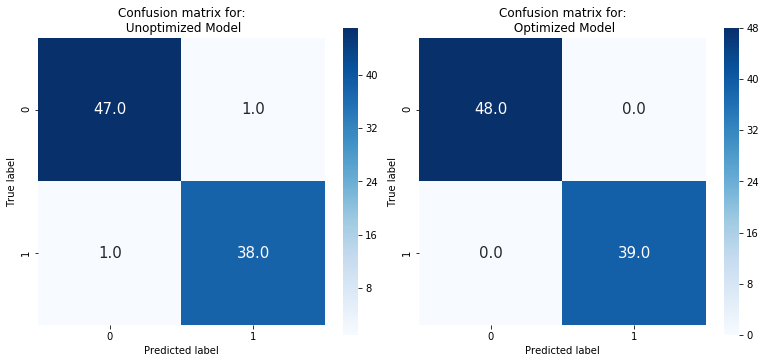

In [54]:
from sklearn.metrics import confusion_matrix
#Visualizing the confusion matrix for each classifier
fig = plt.figure(figsize = (11,5));
for i,model in enumerate([clf, best_clf]): 
    
    ax = fig.add_subplot(1,2, i+1)
    cm = confusion_matrix(y_test, model.predict(X_test))
    # view with a heatmap  
    sns.heatmap(cm, annot=True, annot_kws={"size":15}, 
            cmap='Blues', square=True, fmt='.1f')
    ax.set_xlabel('Predicted label')  
    ax.set_ylabel('True label') 
    if i==0:
        ax.set_title('Confusion matrix for:\n Unoptimized Model');
    else:
        ax.set_title('Confusion matrix for:\n Optimized Model'); 
    fig.tight_layout()
    fig.show()


In [55]:
# Display a description of the original dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Make 10 new customers

In [56]:
import random
random.seed(0)
#10 new customer
def generate_customer():

    new_customers= list()
    for i in range(7):
        # we make customers with percentile 25 and percentile 75 random values of each product  and assign new values  generated to each cost
        c= [random.randrange(int(data.Fresh.describe()[4]), int(data.Fresh.describe()[6])),
            random.randrange(int(data.Milk.describe()[4]), int(data.Milk.describe()[6])),
            random.randrange(int(data.Grocery.describe()[4]), int(data.Grocery.describe()[6])),
            random.randrange(int(data.Frozen.describe()[4]), int(data.Frozen.describe()[6])),
            random.randrange(int(data.Detergents_Paper.describe()[4]), int(data.Detergents_Paper.describe()[6])),
            random.randrange(int(data.Delicatessen.describe()[4]),int(data.Delicatessen.describe()[6]))]
        new_customers.append(c)
    # we make customers with  values 
    new_customers.append([80000,3000,4000,10000,1500,1]) #row 7
    new_customers.append([10000,5000,4000,100000,1500,1] )#row 8
    new_customers.append([10000,5000,4000,100000,3000,1] ) #row 9
    new_customers.append([15000,6000,5000,20000,500,1000])#row 10
    return  pd.DataFrame(new_customers,columns = list(good_data.keys()))
                    

### Predicting segment for the new 10 customers

In [57]:
from sklearn.metrics import precision_recall_fscore_support as score

#generate ten new customer
df_new_customers=generate_customer()
#predict segment for each new customer
predicted= best_clf.predict(df_new_customers)

segment_predicted = pd.DataFrame({"Segment":predicted})
customers_predicted = pd.concat([df_new_customers,segment_predicted], axis = 1)

display(customers_predicted)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Segment
0,14785,5820,5728,1470,2130,979,1
1,13948,3248,6205,2382,3585,1120,1
2,7018,5808,7410,1446,3591,1795,1
3,14312,6636,4789,2794,3551,1373,1
4,9645,2102,5844,2459,3603,1772,1
5,9712,6428,4367,3005,2267,427,1
6,13063,3789,9165,2620,260,1104,1
7,80000,3000,4000,10000,1500,1,0
8,10000,5000,4000,100000,1500,1,0
9,10000,5000,4000,100000,3000,1,0


### Result validation

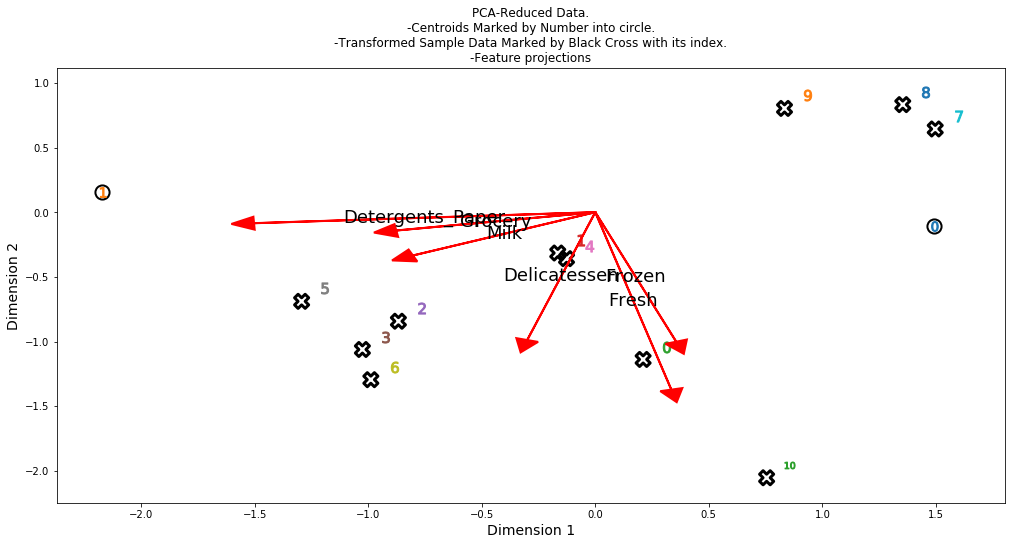

In [58]:
import matplotlib.cm as cm
log_new_customer= np.log(generate_customer())
pca_new_customers = pca.transform(log_new_customer)
cluster_vector_results(centers, pca_new_customers,good_data,cm.get_cmap('gist_rainbow'),2.0,1.0)

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

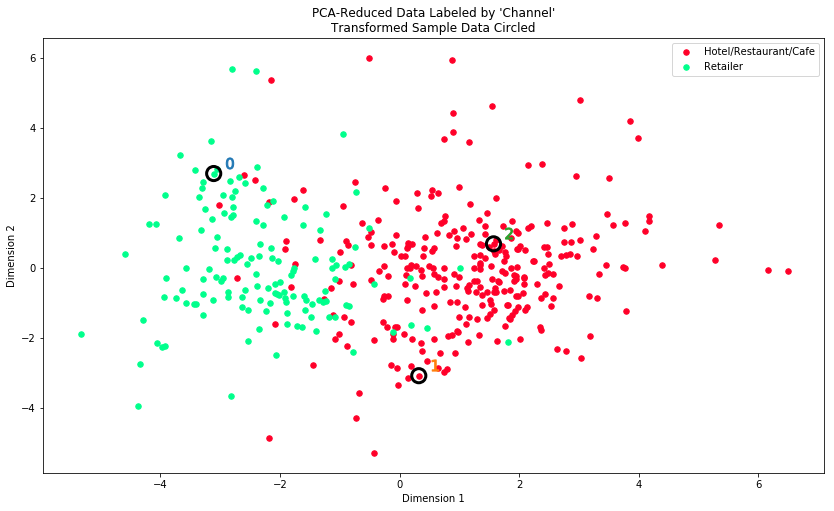

In [59]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

**How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?**

Both the Kmeans algorithm and the number of clusters chosen are highly comparable to the underlying distribution.


**Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?**

There are customer segments that would be purely classified as "Retailers" or "Hotels/"Restaurants/Cafes" on the extreme left and right accordingly.


**Would you consider these classifications as consistent with your previous definition of the customer segments?**

Previous definition:

Segment 0: Establishments in this segment have above median spending on "Fresh" and "Frozen". This could represent Cafe/restaurant.

Segment 1: Establishments in this segment have above median spending on "Milk", "Grocery" and "Detergents_Paper". This segment could be represented like Retailers.

Conclusion: They are almost exactly the guesses I made regarding their classification:

        - Cluster 0 I thought to be Restaurants/Cafes (or something like it).
        - Cluster 1   I thought to be retailers and it is ok.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.